In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df=pd.read_excel("/content/tip-amount.xlsx")

In [3]:
df.drop("Meal", axis=1, inplace=True)

In [4]:
df.head(10)

,Observed total bill(xi),Observed tip amount(yi)
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14
5,51,5


In [16]:
#Modelling
feature=df.drop("Observed tip amount(yi)", axis = 1)
label=df["Observed tip amount(yi)"]

In [12]:
x

,Observed total bill(xi)
0,34
1,108
2,64
3,88
4,99
5,51


In [13]:
x.shape

(6, 1)

In [14]:
y

0     5
1    17
2    11
3     8
4    14
5     5
Name: Observed tip amount(yi), dtype: int64

In [15]:
y.shape

(6,)

In [6]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [7]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topogy
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model 



In [8]:
def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1/1 [==============================] - 0s 315ms/step - loss: 7728.4570 - root_mean_squared_error: 87.9116
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 7292.7036 - root_mean_squared_error: 85.3973
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 6988.7231 - root_mean_squared_error: 83.5986
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 6741.2856 - root_mean_squared_error: 82.1053
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 6526.7773 - root_mean_squared_error: 80.7885
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 6334.3032 - root_mean_squared_error: 79.5883
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 6157.8159 - root_mean_squared_error: 78.4718
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 5993.5659 - root_mean_squared_error: 77.4181
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 5839.05

KeyError: ignored

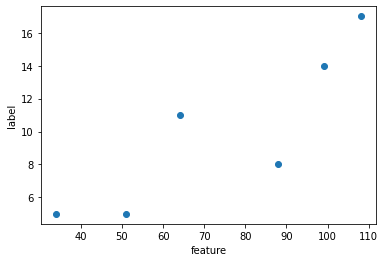

In [17]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, feature, 
                                                         label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, feature, label)
plot_the_loss_curve(epochs, rmse)